In [29]:
# python libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Deep learning 
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Activation
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import itertools
import pydot
import graphviz

In [5]:
# Define the train and validataion data paths.
train_dir = r'C:\Users\USER\Desktop\Final_Projects\.venv\Emotion_Detection\FER2013FolderDataset\train'
val_dir = r'C:\Users\USER\Desktop\Final_Projects\.venv\Emotion_Detection\FER2013FolderDataset\test'

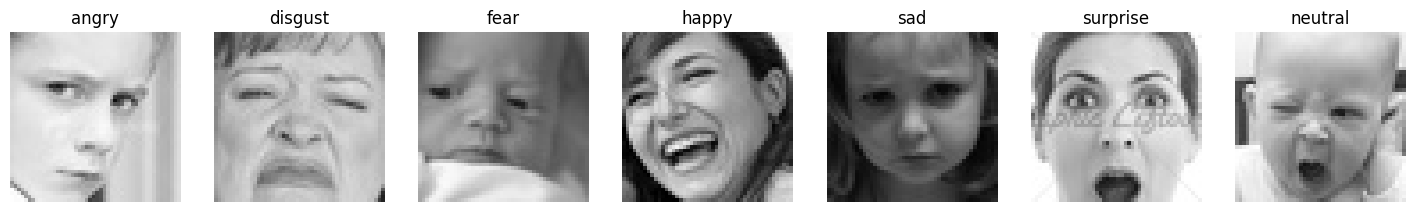

In [6]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [49]:
# Rescale
# Data Augumentation
datagen_train = ImageDataGenerator(rescale = 1./255,)

datagen_val = ImageDataGenerator(rescale = 1./255,)


In [51]:
img_size = 48
batch_size = 64
# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True
                                              )

# Validation data.
val_set = datagen_train.flow_from_directory(directory=val_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=False
                                              )

print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


In [52]:
# CNN Model

# 1st layer

model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (48,48,1)))
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.025))

# 2nd layer

model.add(Conv2D(128,(5,5), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 3rd layer

model.add(Conv2D(512,(3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 4th layer

model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())


# 1st fully connected layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

# 2nd fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))



model.add(Dense(7, activation='softmax'))


model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [53]:
# Get model summary.
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 6, 6, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,726,151 (10.40 MB)

 Trainable params: 2,722,695 (10.39 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [54]:
# Visualize the model.
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [55]:
# Display the saved 'model.png' image
Image(filename='model_1.png')

FileNotFoundError: [Errno 2] No such file or directory: 'model_1.png'

In [56]:
# fit the data into model.
history = model.fit(x=train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    validation_data=val_set,
    validation_steps=val_set.n // val_set.batch_size,
    epochs=15)


print('Your model has been trained!!')

Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3796s 8s/step - accuracy: 0.2188 - loss: 2.2430 - val_accuracy: 0.2494 - val_loss: 2.0583
Epoch 2/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4219 - loss: 1.4727 - val_accuracy: 0.0000e+00 - val_loss: 2.6434
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3258s 7s/step - accuracy: 0.3957 - loss: 1.5904 - val_accuracy: 0.4263 - val_loss: 1.5635
Epoch 4/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4844 - loss: 1.3506 - val_accuracy: 0.7000 - val_loss: 1.3328
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3246s 7s/step - accuracy: 0.4976 - loss: 1.3196 - val_accuracy: 0.5279 - val_loss: 1.2262
Epoch 6/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.5156 - loss: 1.4961 - val_accuracy: 0.8000 - val_loss: 0.6128
Epoch 7/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3262s 7s/step - accuracy: 0.5507 - loss: 1.1777 - val_accuracy: 0.5167 - val_loss: 1.2774
Epoch 8/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5938 - loss: 1.3523 - val_

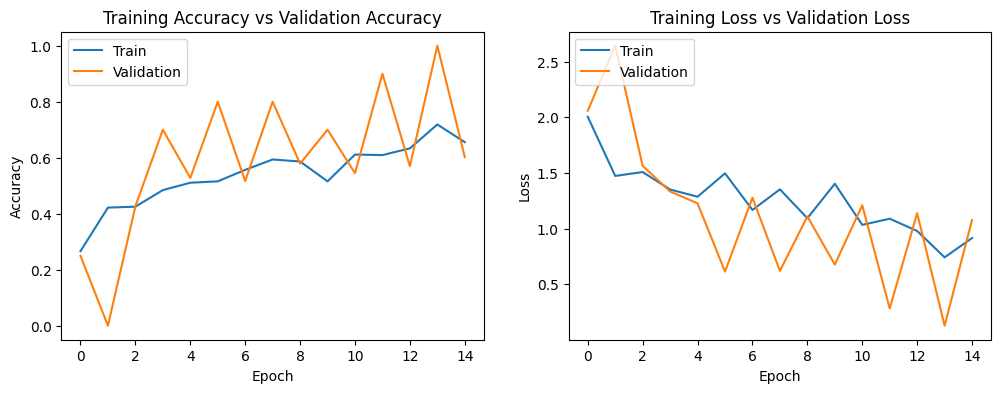

In [57]:
# Create plots for accuracy and loss.
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step


<Figure size 640x480 with 0 Axes>

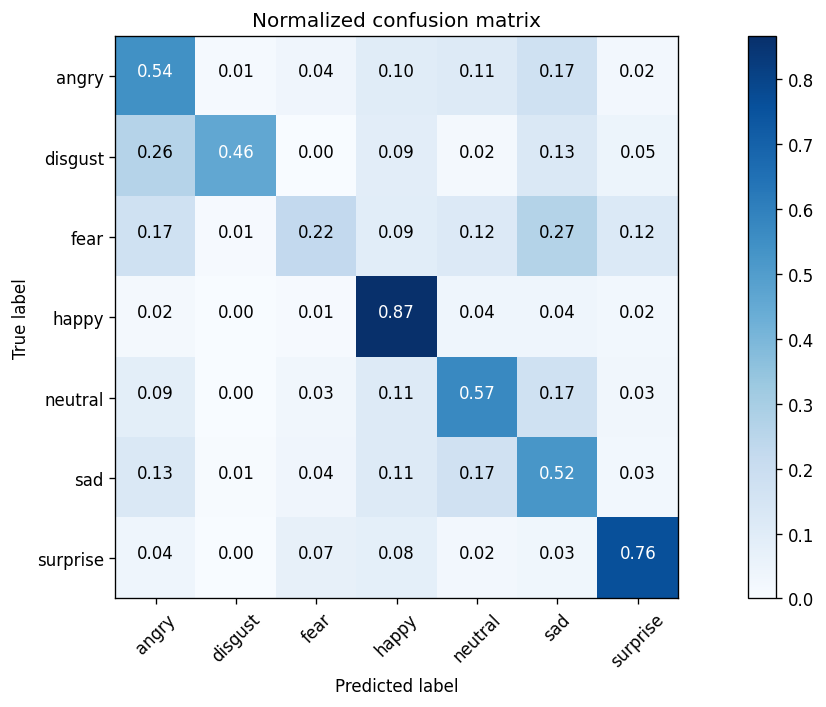

In [58]:
# Create confusion matrix of our predictions

# compute predictions
predictions = model.predict(val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

# Create function to plot confussion matrix.
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6), dpi=120)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')# **Live Class Monitoring System(Face Emotion Recognition)**
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

(48, 48)


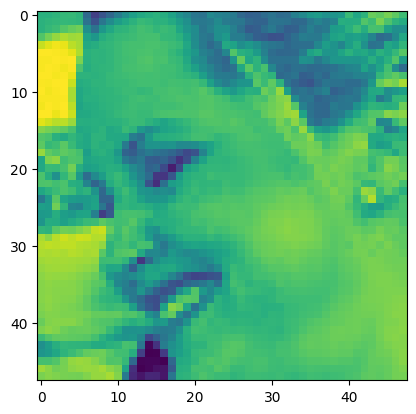

In [59]:
img = image.load_img(r"C:\Users\USER\Desktop\Final_Projects\.venv\Emotion_Detection\FER2013FolderDataset\train\happy\Training_80015.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [60]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [61]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[2.7443353e-24, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [62]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


In [63]:
model.save('model_4.h5')

In [66]:
model.save_weights('model_4.weights.h5')

In [49]:
# Initialize MediaPipe face mesh
mp_face_mesh = mp.solutions.face_mesh

class FER2013Dataset():
    def __init__(self, root_dir, transform = None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {
            "angry": 0,
            "disgust": 1,
            "fear": 2,
            "happy": 3,
            "neutral": 4,
            "sad": 5,
            "surprise": 6
        }  # Mapping emotions to numerical labels  
   
   
   # Function to load and preprocess images (convert to grayscale, resize, normalize)
    def load_images_and_labels(self, directory, image_size=(48, 48)):
        images = []
        labels = []
    
        for emotion in os.listdir(directory):
            emotion_folder = os.path.join(directory, emotion)
            print(f"Emotion Folder: {emotion_folder}")

            if os.path.isdir(emotion_folder):
                # Get the label for the emotion based on the folder name
                label = self.label_map.get(emotion, None)


                # Ensure we have a valid label before proceeding
                if label is not None:
                    for filename in os.listdir(emotion_folder):
                        print(f"Processing file: {filename}")
                        image_path = os.path.join(emotion_folder, filename)

                        if filename.endswith(('.jpg')):  # Ensure it's an image file
                            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                            if image is None:
                                print(f"Could not load image: {image_path}")
                                continue  # Skip invalid images

            # Read and preprocess the image
            #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            image_resized = cv2.resize(image, image_size)  # Resize to 48x48
            image_normalized = image_resized / 255.0  # Normalize to range [0, 1]
            #image_normalized = np.expand_dims(image_normalized, axis=-1)  # Add grayscale channel
            
            images.append(image_normalized)
            labels.append(label)
    
        return np.array(images), np.array(labels)

# Load training and test data
train_dir = r'C:\Users\USER\Desktop\Final_Projects\.venv\Emotion_Detection\FER2013FolderDataset\train'
test_dir = r'C:\Users\USER\Desktop\Final_Projects\.venv\Emotion_Detection\FER2013FolderDataset\test'  # Path to your test folder


# Create an instance of the dataset class
dataset = FER2013Dataset(train_dir)


# Load the images and labels
X_train_images, y_train_labels = dataset.load_images_and_labels(train_dir)
X_test_images, y_test_labels = dataset.load_images_and_labels(test_dir)

# After loading the dataset, print out the unique labels to verify the data
X_train_images, y_train_labels = dataset.load_images_and_labels(train_dir)

#print("Unique labels in y_train_labels:", np.unique(y_train_labels))


# Normalize the pixel values
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

X_train_images = X_train_images.reshape(-1, 48, 48, 1)
X_test_images = X_test_images.reshape(-1, 48, 48, 1)

# Assuming X_train_images is (num_samples, height, width, channels)
# Step 1: Flatten the image data
X_train_flattened = X_train_images.reshape(X_train_images.shape[0], -1)


# Check the distribution of classes
unique_classes, class_counts = np.unique(y_train_labels, return_counts=True)
print(f"Classes: {unique_classes}")
print(f"Counts: {class_counts}")

# Ensure you have more than one class
if len(unique_classes) <= 1:
    raise ValueError(f"Cannot apply SMOTEENN because there is only one class in the target labels: {unique_classes}")
  
# Step 1: Flatten the image data to 2D (samples, height * width * channels)
#X_train_flattened = X_train_images.reshape(X_train_images.shape[0], -1)
X_train_flattened = X_train_images.reshape(X_train_images.shape[0], -1)

# Step 2: Apply SMOTEENN (now the data is 2D, which SMOTEENN expects)
#smote_enn = SMOTEENN(random_state=42)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_flattened, y_train_labels)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train_flattened, y_train_labels)

# Step 3: Reshape the data back to 4D after resampling
X_resampled_reshaped = X_resampled.reshape(X_resampled.shape[0], 48, 48, 1)
#y_resampled_reshaped = y_resampled.reshape(y_resampled.shape[0],48,48,1)


print("Resampling complete. New dataset shape:", X_resampled_reshaped.shape)



#unique_classes, class_counts = np.unique(y_train_labels, return_counts=True)
#print(f"Classes: {unique_classes}")
#print(f"Counts: {class_counts}")

# Data Augumentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')



# Assuming there are 7 classes in total
#y_test_labels = to_categorical(y_test_labels, num_classes=7)


# Create a generator for the training set
train_generator = datagen.flow(X_resampled_reshaped, y_resampled, batch_size=32)
#train_generator = datagen.flow_from_directory(X_resampled_reshaped, y_resampled_reshaped, batch_size=32)
#test_generator = (X_test_images, y_test_labels)  # No augmentation for test data

# Create a generator for the test set without augmentation
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(X_test_images, y_test_labels, batch_size=32)
#test_generator = test_datagen.flow_from_directory(X_test_images, y_test_labels, batch_size=32)


# Ensure y_test_labels is in the correct format
if len(y_test_labels.shape) == 1:
    y_resampled = to_categorical(y_resampled, num_classes=7)
    y_test_labels = to_categorical(y_test_labels, num_classes=7)


print("Shape of y_resampled:", y_resampled.shape)  # Should be (num_samples, 7)
print("Shape of y_test_labels:", y_test_labels.shape)  # Should be (num_samples, 7)


# Fit the model using the generator
#history = model.fit(train_generator, epochs=5, validation_data=test_generator, callbacks=[stop_early])



Emotion Folder: C:\Users\USER\Desktop\Final_Projects\.venv\Emotion_Detection\FER2013FolderDataset\train\angry
Processing file: Training_10118481.jpg
Processing file: Training_10120469.jpg
Processing file: Training_10131352.jpg
Processing file: Training_10161559.jpg
Processing file: Training_1021836.jpg
Processing file: Training_10269675.jpg
Processing file: Training_10278738.jpg
Processing file: Training_10290703.jpg
Processing file: Training_10295477.jpg
Processing file: Training_10315441.jpg
Processing file: Training_10316849.jpg
Processing file: Training_10333072.jpg
Processing file: Training_10334355.jpg
Processing file: Training_10345473.jpg
Processing file: Training_10422050.jpg
Processing file: Training_10485618.jpg
Processing file: Training_10503476.jpg
Processing file: Training_10524198.jpg
Processing file: Training_10539399.jpg
Processing file: Training_10592361.jpg
Processing file: Training_10595751.jpg
Processing file: Training_10608067.jpg
Processing file: Training_1074035

In [37]:
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape = (48, 48, 1)))

    hp_activation = hp.Choice('activation', values = ['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value = 16, max_value = 1000, step = 100)
    hp_layer_2 = hp.Int('layer_2', min_value = 16, max_value = 1000, step = 100)
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

    model.add(tf.keras.layers.Dense(units = hp_layer_1, activation = hp_activation))
    model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization
    model.add(tf.keras.layers.Dense(units = hp_layer_2, activation = hp_activation))
    model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization
    model.add(tf.keras.layers.Dropout(0.5))  # Drops 50% of neurons
    model.add(tf.keras.layers.Dense(64, kernel_regularizer=l2(0.001), activation='relu'))
    model.add(tf.keras.layers.Dense(7, activation = 'softmax'))
    

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss = tf.keras.losses.categorical_crossentropy,
                  metrics = ['accuracy'])
    return model

In [38]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'fer2013')

Reloading Tuner from my_dir\fer2013\tuner0.json


In [39]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights=True)

In [40]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [41]:
tuner.search(train_generator, epochs = 50, validation_split = 0.2, callbacks = [stop_early, reduce_lr])

In [42]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [50]:
model = tuner.hypermodel.build(best_hps)
#history = model.fit(X_train_images, y_train_labels, epochs = 50, validation_split = 0.2, callbacks = [stop_early, reduce lr])


# Fit the model using the generator
#history = model.fit(X_resampled_reshaped, y_resampled, epochs=5, validation_data=(X_test_images, y_test_labels), callbacks = [stop_early, reduce_lr])

history = model.fit(X_resampled_reshaped, y_resampled, epochs=5, validation_data= test_generator , callbacks = [stop_early, reduce_lr])

c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.0000e+00 - loss: 2.4162

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 7)

In [54]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Model
from kerastuner import HyperParameters, RandomSearch


# Convert X_resampled_reshaped to RGB
X_resampled_rgb = np.repeat(X_resampled_reshaped, 3, axis=-1)  # Convert to (None, 48, 48, 3)

# Convert X_test_images to RGB as well
X_test_rgb = np.repeat(X_test_images, 3, axis=-1)  # Convert test images to RGB


# Model builder function combining ResNet50 with custom layers
def model_builder(hp):
    # Load ResNet50 (using it in place of ResNet18)
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
    
    # Freeze all the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add a Flatten layer after the ResNet50 model
    x = Flatten()(base_model.output)

    # Hyperparameter tuning for activation functions and layer sizes
    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=16, max_value=1000, step=100)
    hp_layer_2 = hp.Int('layer_2', min_value=16, max_value=1000, step=100)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Custom layers added to the top of ResNet50
    x = Dense(units=hp_layer_1, activation=hp_activation)(x)
    x = BatchNormalization()(x)
    x = Dense(units=hp_layer_2, activation=hp_activation)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)  # Drops 50% of neurons for regularization
    x = Dense(64, kernel_regularizer=l2(0.001), activation='relu')(x)

    # Output layer for 7-class classification
    output = Dense(7, activation='softmax')(x)

    # Define the full model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

# Setup Keras Tuner
tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,  # Adjust based on your preference
    executions_per_trial=3,
    directory='tuner_dir',
    project_name='resnet_combined_model'
)

# Start hyperparameter search
tuner.search(X_resampled_reshaped, y_resampled, epochs=10, validation_data=(X_test_images, y_test_labels))

# Get the best hyperparameters and build the model
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(
    X_resampled_reshaped, 
    y_resampled,
    epochs=10,
    validation_data=(X_test_images, y_test_labels),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)]
)

# Optionally unfreeze some ResNet50 layers and fine-tune
for layer in model.layers[0].layers[-5:]:  # Unfreeze last 5 layers of ResNet50
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(
    X_resampled_reshaped, 
    y_resampled,
    epochs=5,
    validation_data=(X_test_images, y_test_labels),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
)

# You can now evaluate or save your model as needed
model.evaluate()

Reloading Tuner from tuner_dir\resnet_combined_model\tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
tanh              |relu              |activation
416               |916               |layer_1
916               |816               |layer_2
0.001             |0.001             |learning_rate

Epoch 1/10


Traceback (most recent call last):
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\USER\Desktop\Final_Projects\.venv\Lib\site-packages\keras\src\layers\input_spec.py", line 227, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "conv1_conv" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 54, 54, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 48, 48, 1), dtype=float32)
  • training=True
  • mask=None
